# Imports

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt
from colicoords.cnn.unet import get_unet_256
from colicoords.cnn.preprocess import resize_stack, norm_hampel
from colicoords.iplot import iter_subplots
import numpy as np
import mahotas as mh
import tifffile

In [2]:
bf = np.load('bf_noise_{}_photons.npy'.format(10000))
brightfield_resized = resize_stack(bf, 0.5)
del bf

In [3]:
bf_norm = np.stack([norm_hampel(arr) for arr in brightfield_resized])

<IPython.core.display.Javascript object>


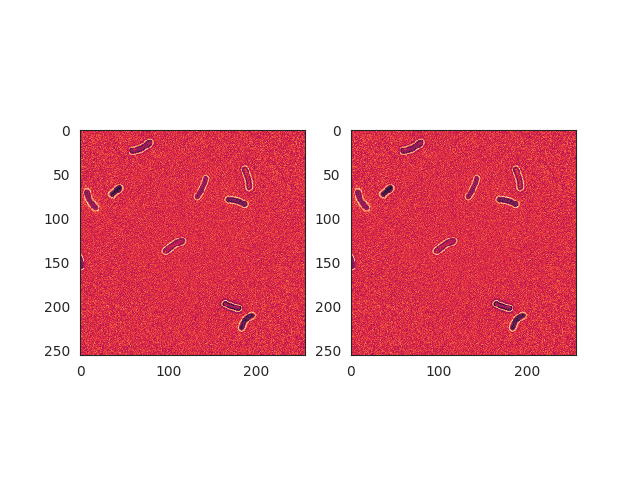

In [4]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(brightfield_resized[0])
axes[1].imshow(bf_norm[0])

In [5]:
model = get_unet_256(input_shape=(256, 256, 1))

In [6]:
model.load_weights('wts/wts_bf_10000_photons_50-0.0133.h5')

In [7]:
prediction = model.predict(np.expand_dims(bf_norm, -1))

In [8]:
predict_resized = resize_stack(prediction.squeeze(), 2)
predict_resized.shape

(1000, 512, 512)

<IPython.core.display.Javascript object>


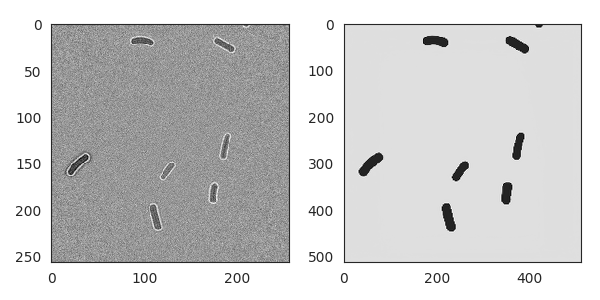

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(bf_norm[400], cmap='gray')
axes[1].imshow(predict_resized[400], cmap='gray_r')
plt.tight_layout()

In [14]:
predict_resized.shape

(1000, 512, 512)

In [16]:
tifffile.imsave('binary_10000photons_predicted.tif', (predict_resized > 0.5).astype(int))

<IPython.core.display.Javascript object>


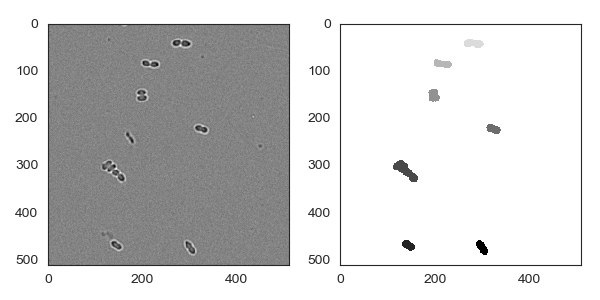

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(brightfield[30], cmap='gray')
axes[1].imshow(labeled_binary[30], cmap='gray_r')
plt.tight_layout()

# 1000 photons

In [4]:
bf = np.load('bf_noise_{}_photons.npy'.format(1000))
brightfield_resized = resize_stack(bf, 0.5)
del bf

In [5]:
bf_norm = np.stack([norm_hampel(arr) for arr in brightfield_resized])

<IPython.core.display.Javascript object>


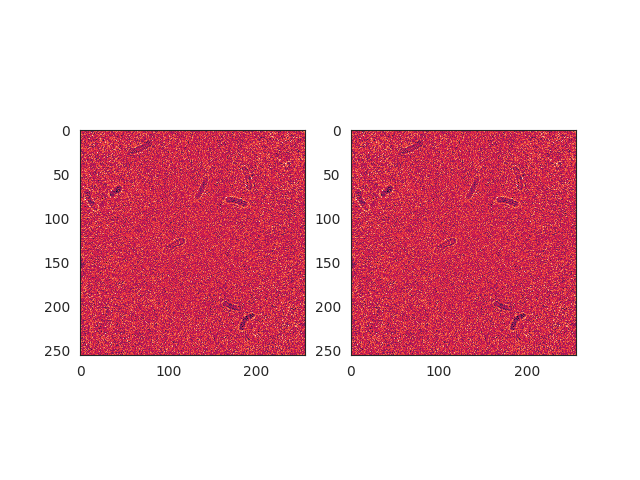

In [6]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(brightfield_resized[0])
axes[1].imshow(bf_norm[0])

In [7]:
model = get_unet_256(input_shape=(256, 256, 1))

In [8]:
model.load_weights('wts/wts_bf_1000_photons_50-0.0136.h5')

In [9]:
prediction = model.predict(np.expand_dims(bf_norm, -1))
predict_resized = resize_stack(prediction.squeeze(), 2)
predict_resized.shape

(1000, 512, 512)

<IPython.core.display.Javascript object>


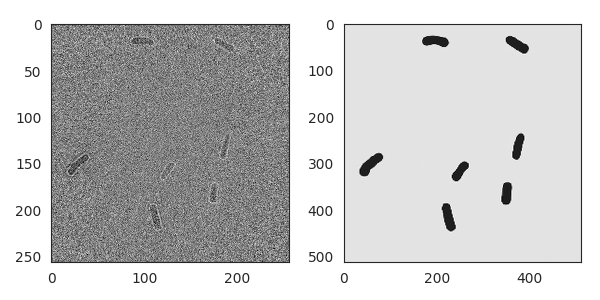

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(bf_norm[400], cmap='gray')
axes[1].imshow(predict_resized[400], cmap='gray_r')
plt.tight_layout()

In [11]:
tifffile.imsave('binary_1000photons_predicted.tif', (predict_resized > 0.5).astype(int))

In [12]:
bf = np.load('bf_noise_{}_photons.npy'.format(500))
brightfield_resized = resize_stack(bf, 0.5)
del bf

In [13]:
bf_norm = np.stack([norm_hampel(arr) for arr in brightfield_resized])

<IPython.core.display.Javascript object>


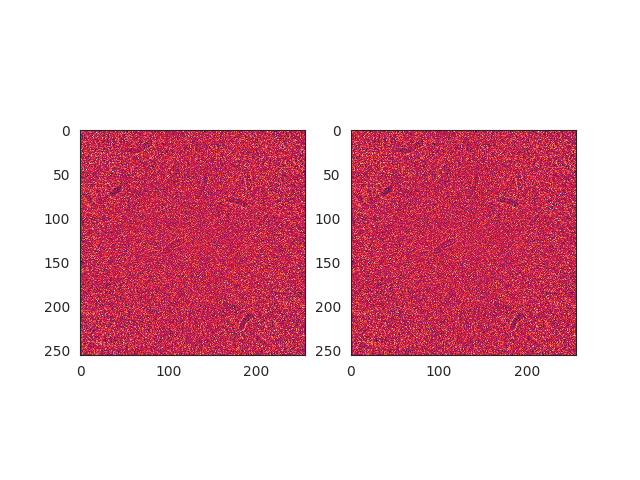

In [14]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(brightfield_resized[0])
axes[1].imshow(bf_norm[0])

In [16]:
model.load_weights('wts/wts_bf_500_photons_48-0.0393.h5')

In [17]:
prediction = model.predict(np.expand_dims(bf_norm, -1))

In [18]:
predict_resized = resize_stack(prediction.squeeze(), 2)
predict_resized.shape

(1000, 512, 512)

In [30]:
tifffile.imsave('binary_500photons_predicted.tif', (predict_resized > 0.5).astype(int))

<IPython.core.display.Javascript object>


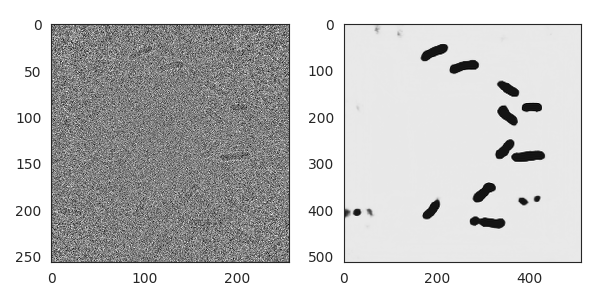

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(bf_norm[100], cmap='gray')
axes[1].imshow(predict_resized[100], cmap='gray_r')
plt.tight_layout()

In [23]:
bin_truth = np.load('binary.npy')

<IPython.core.display.Javascript object>


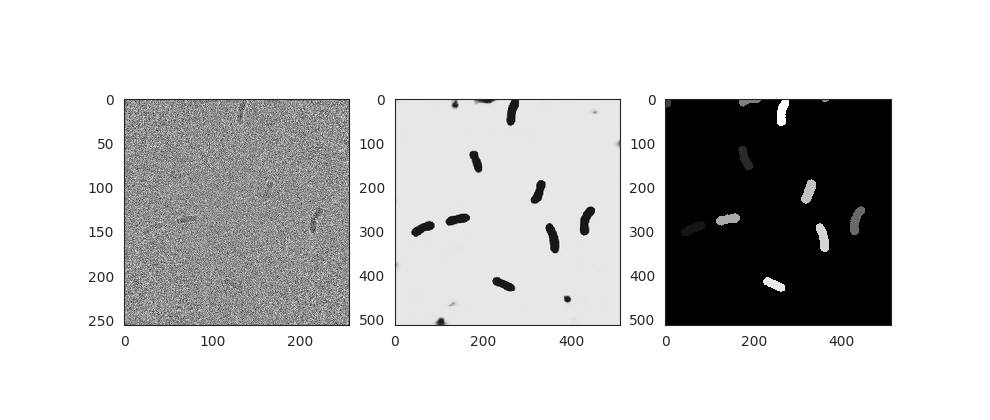

In [29]:
fig, axes = iter_subplots(1, 3, figsize=(8, 3))
axes[0].iter_imshow(bf_norm, cmap='gray')
axes[1].iter_imshow(predict_resized, cmap='gray_r')
axes[2].iter_imshow(bin_truth, cmap='gray')
fig.display()